# Eigenfaces: Dogs and Cats

Based on the article: L. Sirovich and M. Kirby; "Low-dimensional procedure for the characterization of human faces."

## Imports

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import \
(accuracy_score, classification_report, confusion_matrix)

## Data collection

## Data normalization and preparation

In [ ]:
# transformation to a uniform format (e.g. in grayscale, resolution)
# reduce differences in lighting or animal orientation

## Converting images to matrices

In [ ]:
# convert images into pixel value matrices
# each image will become a data vector, where each pixel is one value of the vector

## Calculation of the average image

In [ ]:
# calculate the average image from a set of photos by summing the pixel values of each image and dividing by the number of images

## Calculation of the deviation from the average image

In [ ]:
# subtract the mean image from each image to obtain the deviation matrices

## Construction of the covariance matrix

In [ ]:
# use the deviations to build a covariance matrix
# this matrix will represent how pixels differ from the mean relative to each other

## Calculation of eigenvalues and vectors

In [ ]:
# calculate the eigenvalues and eigenvectors of the covariance matrix
# the eigenvectors will be "eigenpictures" (eigenanimals), which are the main components of the image

## Image reconstruction

In [ ]:
# each image can now be expressed as a linear combination of these eigenanimals
# this allows you to reduce the amount of data by storing only the coefficients of this combination

## Classification

In [ ]:
# classification using eigenfaces coefficients

---

### PCA metodą Sirovicha i Kirby'ego

In [2]:
def load_images_from_folder(folder, size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konwersja do skali szarości
            images.append(img.flatten())
    return images


In [ ]:
# Ładowanie obrazów kotów i psów
cat_images = load_images_from_folder('cat', size=(100, 100))
dog_images = load_images_from_folder('dog', size=(100, 100))

In [27]:
print(len(cat_images), len(dog_images))

5558 5169


In [28]:
# Łączenie obrazów kotów i psów w jeden zbiór danych
all_images = np.array(cat_images + dog_images)
print(len(all_images))

10727


In [5]:
# Tasowanie obrazów
np.random.shuffle(all_images)

In [6]:
# Normalizacja danych
mean_image = np.mean(all_images, axis=0)
centered_images = all_images - mean_image

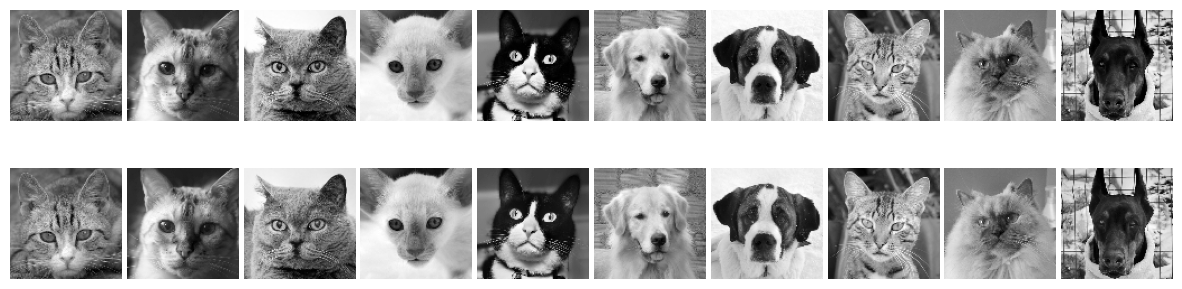

In [7]:
# Wizualizacja oryginalnych i wyśrodkowanych obrazów
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    # Oryginalne obrazy
    ax = axes[0, i]
    ax.imshow(all_images[i].reshape(100, 100), cmap='gray')
    ax.axis('off')  # Usunięcie osi

    # Wyśrodkowane obrazy
    ax = axes[1, i]
    ax.imshow(centered_images[i].reshape(100, 100), cmap='gray')
    ax.axis('off')  # Usunięcie osi

# Dopasowanie odstępów między wykresami
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [8]:
# Przeprowadzenie PCA
pca = PCA(n_components=50)  # Liczba głównych składowych
pca.fit(centered_images)

eigenfaces = pca.components_.reshape((50, 100, 100))

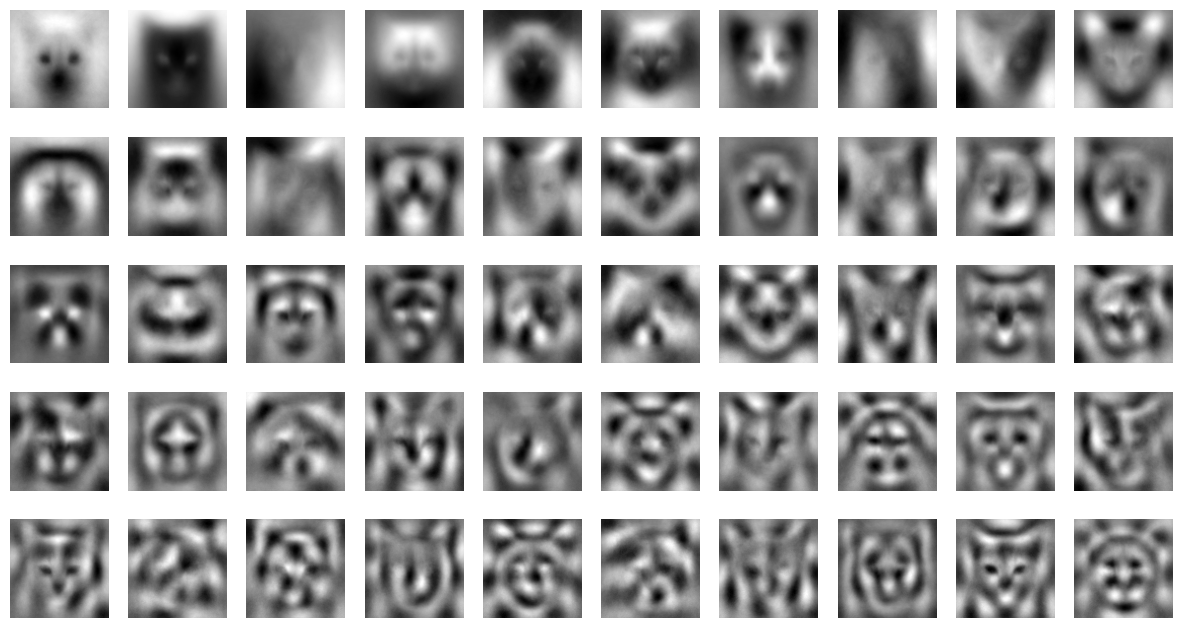

In [9]:
# Wizualizacja eigenfaces (wyświetlamy główne składowe)
fig, axes = plt.subplots(5, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')
plt.show()

In [10]:
# Rekonstrukcja obrazów
reconstructed_images = pca.inverse_transform(pca.transform(centered_images))
reconstructed_images = reconstructed_images.reshape((-1, 100, 100))

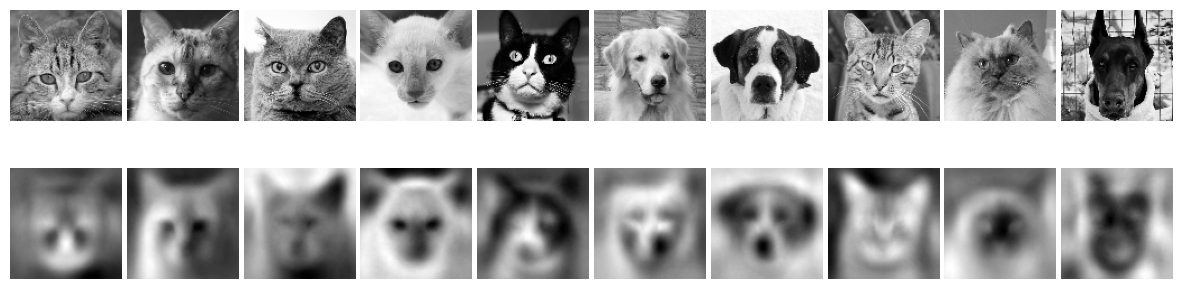

In [11]:
# Wizualizacja oryginalnych i zrekonstruowanych obrazów
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    # Oryginalne obrazy
    ax = axes[0, i]
    ax.imshow(all_images[i].reshape(100, 100), cmap='gray')
    ax.axis('off')  # Usunięcie osi

    # Zrekonstruowane obrazy
    ax = axes[1, i]
    ax.imshow(reconstructed_images[i], cmap='gray')
    ax.axis('off')  # Usunięcie osi

# Dopasowanie odstępów między wykresami
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

---

## Przygotowanie danych i obliczenie eigenfaces

In [38]:
# Funkcja do ładowania obrazów i przekształcania ich na wektory
def load_images_from_folder(folder, size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konwersja do skali szarości
            images.append(img.flatten())
    return images


In [39]:
# Ładowanie obrazów kotów i psów
cat_images = load_images_from_folder('cat', size=(100, 100))
dog_images = load_images_from_folder('dog', size=(100, 100))

In [40]:
# Łączenie obrazów kotów i psów w jeden zbiór danych
all_images = np.array(cat_images + dog_images)
labels = np.array([0] * len(cat_images) + [1] * len(dog_images))  # 0 = Cat, 1 = Dog

In [41]:
# Przetasowanie obrazków i etykiet
indices = np.random.permutation(len(all_images))
all_images = all_images[indices]
labels = labels[indices]

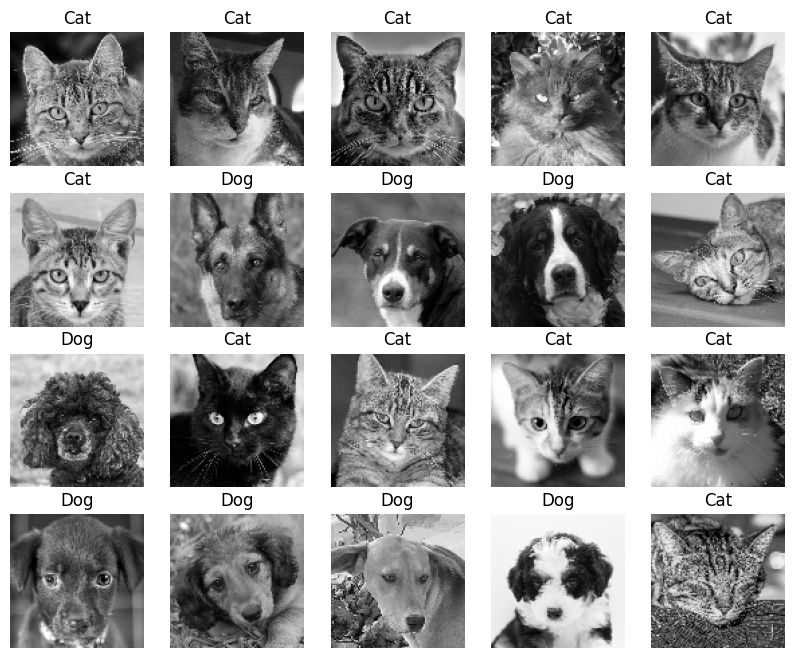

In [42]:
# Wizualizacja obrazków z etykietami
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i].reshape(100, 100), cmap='gray')
    ax.axis('off')
    if labels[i] == 0:
        ax.set_title('Cat')
    else:
        ax.set_title('Dog')
plt.show()

In [43]:
# Normalizacja danych
mean_image = np.mean(all_images, axis=0)
centered_images = all_images - mean_image

In [44]:
# Przeprowadzenie PCA - można posprawdzać różne liczby pca - 50 > 100
n_components = 50
pca = PCA(n_components=n_components)
pca.fit(centered_images)

PCA(n_components=50)

In [45]:
# Ekstrakcja współczynników eigenfaces
eigenfaces = pca.components_.reshape((n_components, 100, 100))
transformed_images = pca.transform(centered_images)

## Ekstrakcja współczynników eigenfaces
Współczynniki eigenfaces to wyniki transformacji PCA (transformed_images), które mogą być używane jako cechy do klasyfikacji.

## Klasyfikacja
Użyjemy współczynników eigenfaces do trenowania modelu klasyfikacji SVM.

In [46]:
# Podział danych na zbiór treningowy i testowy - dla [:500] już działa długo, a mamy 10727 obrazków
# X_train, X_test, y_train, y_test = train_test_split(transformed_images, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(transformed_images[:100], labels[:100], test_size=0.2, random_state=42)

In [47]:
# Testowanie różnych parametrów modelu
from sklearn.model_selection import GridSearchCV

# Przygotowanie siatki parametrów do przetestowania
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=SVC(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Przeszukiwanie siatki parametrów
grid_search.fit(X_train, y_train)

# Wybór najlepszego modelu
best_svm = grid_search.best_estimator_

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry SVM:")
print(grid_search.best_params_)

# Ewaluacja na zbiorze testowym
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność na zbiorze testowym: {accuracy * 100:.2f}%")
# {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'} accuracy 65%

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Najlepsze parametry SVM:
{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
Dokładność na zbiorze testowym: 65.00%


In [48]:
# Trenowanie modelu SVM - bez grid search cv, bo dla zbioru obrazków > 100 działa za długo
best_svm = SVC(kernel='linear', C=1.0, random_state=42) # accuracy 65%
best_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [49]:
# Predykcja na zbiorze testowym
y_pred = best_svm.predict(X_test)

In [50]:
# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność: {accuracy * 100:.2f}%")
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

Dokładność: 65.00%
Raport klasyfikacji:
               precision    recall  f1-score   support

         Cat       0.82      0.64      0.72        14
         Dog       0.44      0.67      0.53         6

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.63        20
weighted avg       0.71      0.65      0.66        20



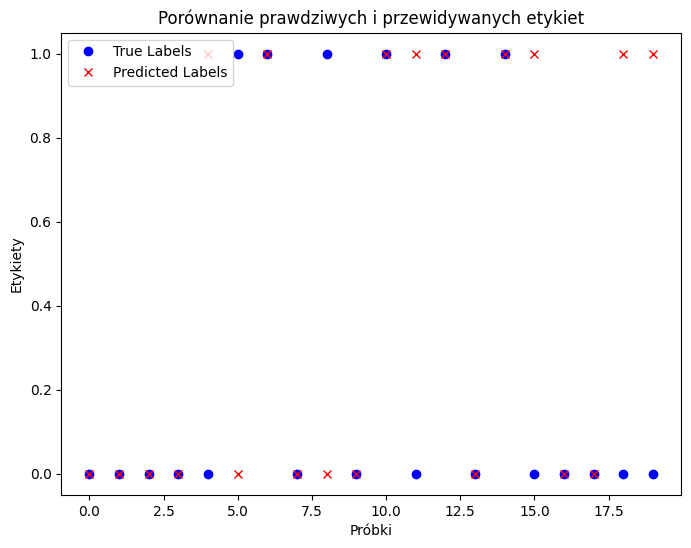

In [51]:
# Wykres dokładności - śmieszny wykres
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='None', color='b')
plt.plot(range(len(y_test)), y_pred, label='Predicted Labels', marker='x', linestyle='None', color='r')
plt.title('Porównanie prawdziwych i przewidywanych etykiet')
plt.xlabel('Próbki')
plt.ylabel('Etykiety')
plt.legend()
plt.show()

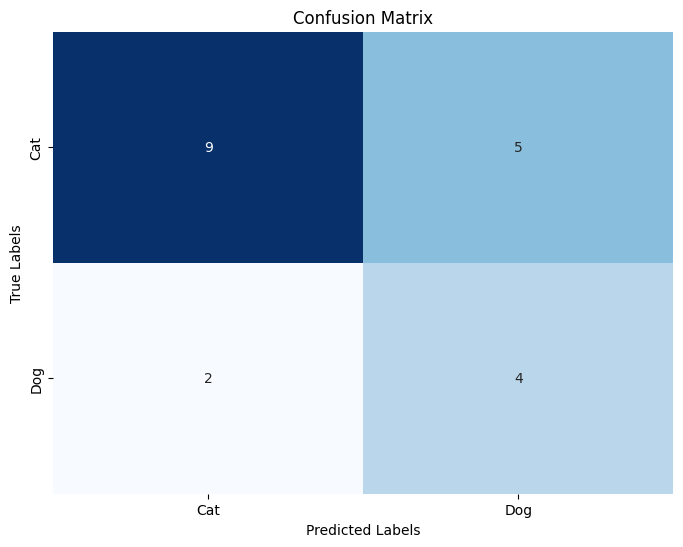

In [52]:
# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
           xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

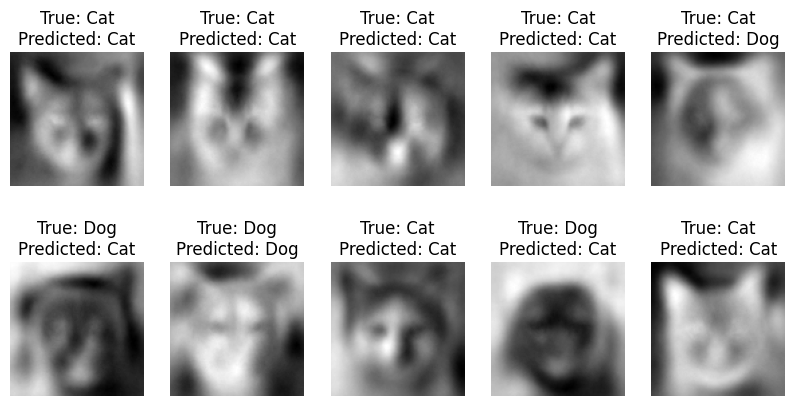

In [53]:
# Rekonstrukcja obrazków ze zredukowanych wymiarów
test_images = pca.inverse_transform(X_test)

# Wizualizacja obrazków z prawdziwymi i przewidzianymi etykietami
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].reshape(100, 100), cmap='gray')
    ax.axis('off')
    if y_pred[i] == 0:
        pred_label = 'Cat'
    else:
        pred_label = 'Dog'
    if y_test[i] == 0:
        true_label = 'Cat'
    else:
        true_label = 'Dog'
    ax.set_title(f'True: {true_label}\nPredicted: {pred_label}')
plt.show()

## Podsumowanie kodu:
- Ładowanie i przetwarzanie obrazów: Ładowanie obrazów kotów i psów, zmniejszanie rozmiaru do 100x100 pikseli i konwersja do skali szarości.
- Przygotowanie danych: Obliczenie średniego obrazu i przekształcenie obrazów na macierz odchyleń.
- PCA: Przeprowadzenie PCA, aby uzyskać główne składowe (eigenfaces) i przekształcenie obrazów na współczynniki eigenfaces.
- Klasyfikacja: Podział danych na zbiór treningowy i testowy, trenowanie modelu SVM na współczynnikach eigenfaces, predykcja i ocena modelu.